<a href="https://colab.research.google.com/github/itimes-digital/deep-learning-estudo/blob/main/classificacao_multiclasse/classificacao-multiclasse_iris_validacao_cruzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
base = pd.read_csv('https://raw.githubusercontent.com/itimes-digital/deep-learning-estudo/main/dataset/iris.csv', sep=',')
base.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


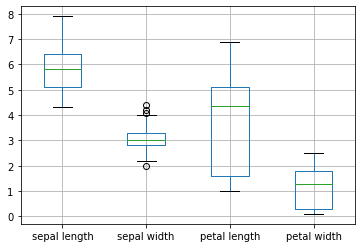

In [25]:
base[['sepal length',	'sepal width',	'petal length',	'petal width']].boxplot()

In [3]:
previsores = base.iloc[:, 0:4].values
classe = base.iloc[:, 4].values

In [4]:
classe

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [5]:
classe.shape

(150,)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential # camadas sequencialmente
from keras.layers import Dense # camadas profundas fullconnect ou densa
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

**Deve transformar dados categórico para numérico.**

In [7]:
labelEncoder = LabelEncoder()
classe = labelEncoder.fit_transform(classe)
classe # 3 tipos em uma coluna

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# Transformação categórica em 3 colunas
# iris - setosa     1 0 0
# iris - virginica  0 1 0
# iris - versicolor 0 0 1
classe_dummy = np_utils.to_categorical(classe)
classe_dummy

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [10]:
# (quantidade de entrada + quantidade de saída) / 2
units = np.round((4 + 3) / 2)
units

4.0

In [11]:
classificador = Sequential();
classificador.add(Dense(units = units, 
                        activation = 'relu',
                        input_dim = 4));

classificador.add(Dense(units=units, 
                        activation = 'relu'));

# Função softmax retorna probabilidade para cada classe
classificador.add(Dense(units=3, activation = 'softmax'));

classificador.compile(optimizer = 'adam', 
                      loss = 'categorical_crossentropy',
                      metrics = ['categorical_accuracy']);

classificador.fit(previsores_treinamento, 
                  classe_treinamento, 
                  batch_size = 10,
                  epochs = 1000)

Epoch 1/1000
12/12 [==============================] - 0s 1ms/step - loss: 1.1800 - categorical_accuracy: 0.1429
Epoch 2/1000
12/12 [==============================] - 0s 1ms/step - loss: 1.1330 - categorical_accuracy: 0.2768
Epoch 3/1000
12/12 [==============================] - 0s 1ms/step - loss: 1.0844 - categorical_accuracy: 0.3125
Epoch 4/1000
12/12 [==============================] - 0s 1ms/step - loss: 1.0475 - categorical_accuracy: 0.3393
Epoch 5/1000
12/12 [==============================] - 0s 1ms/step - loss: 1.0153 - categorical_accuracy: 0.3393
Epoch 6/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.9772 - categorical_accuracy: 0.4375
Epoch 7/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.9505 - categorical_accuracy: 0.4643
Epoch 8/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.9360 - categorical_accuracy: 0.5268
Epoch 9/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.9205 - categorical_accuracy:

In [12]:
resultado = classificador.evaluate(previsores_teste, classe_teste)
resultado

2/2 [==============================] - 0s 2ms/step - loss: 0.0156 - categorical_accuracy: 1.0000


[0.015583038330078125, 1.0]

In [13]:
previsoes = classificador.predict(previsores_teste)
previsoes

array([[5.22226060e-07, 9.68245387e-01, 3.17540504e-02],
       [9.99968648e-01, 3.13633063e-05, 8.04822318e-17],
       [2.30623159e-11, 1.40344994e-02, 9.85965490e-01],
       [9.99956608e-01, 4.33602872e-05, 2.03397783e-16],
       [9.99724090e-01, 2.75929982e-04, 1.41948128e-14],
       [9.65311574e-06, 9.99707520e-01, 2.82814901e-04],
       [5.49225650e-14, 4.48158593e-04, 9.99551833e-01],
       [1.83744100e-06, 9.99644756e-01, 3.53431387e-04],
       [9.99945283e-01, 5.47150375e-05, 5.73403824e-16],
       [9.99980569e-01, 1.94262575e-05, 6.12253116e-18],
       [3.89029260e-11, 2.22554114e-02, 9.77744639e-01],
       [3.18647182e-07, 9.88533795e-01, 1.14658307e-02],
       [4.78217205e-12, 4.04534070e-03, 9.95954633e-01],
       [8.63884647e-13, 2.50804005e-03, 9.97491956e-01],
       [9.99973416e-01, 2.66278239e-05, 3.43333158e-17],
       [9.99848485e-01, 1.51506407e-04, 2.48939108e-15],
       [2.30362758e-07, 9.98130381e-01, 1.86943496e-03],
       [8.20326931e-11, 3.88738

In [14]:
previsoes = (previsoes > 0.5)
previsoes

array([[False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [Fa

In [17]:
classe_teste2 = [np.argmax(t) for t in classe_teste]
classe_teste2

[1,
 0,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 2,
 2,
 1,
 2,
 1,
 0,
 0]

In [20]:
classe_teste

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [21]:
previsoes2 = [np.argmax(t) for t in previsoes]
previsoes2

[1,
 0,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 2,
 2,
 1,
 2,
 1,
 0,
 0]

In [18]:
from sklearn.metrics import confusion_matrix

In [22]:
matriz = confusion_matrix(previsoes2, classe_teste2)
matriz

array([[15,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 13]])

In [23]:
import seaborn as sn
import matplotlib.pyplot as plt

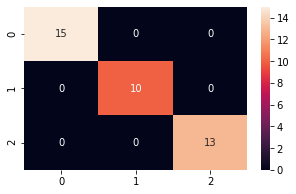

In [24]:
plt.figure(figsize=(5, 3))
sn.heatmap(matriz, annot=True)
plt.show()